#                        NLP: Sentiment Classification
### Devisetty Mithil Sri Sai

In [2]:
#Import Libraries
import sys
import random
import re
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
dff = pd.read_csv("C:/Users/MITHIL/Downloads/Twitter_Data.csv")
print("Dimensions = ",dff.shape)
features = list(dff.columns.values)
print("\nFeatures:\n", features)
print("\nData :")
dff.head()

Dimensions =  (162980, 2)

Features:
 ['clean_text', 'category']

Data :


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
print("Before Cleaning:\n", dff.isnull().sum())
dff = dff[~dff['category'].isnull()]
dff = dff[~dff['clean_text'].isnull()]
print("\nAfter Cleaning:\n", dff.isnull().sum())

Before Cleaning:
 clean_text    4
category      7
dtype: int64

After Cleaning:
 clean_text    0
category      0
dtype: int64


In [5]:
# Note: googletrans version == 4.0.0rc1 (default is 3.0.0 which doesnt work properly)
from googletrans import Translator
import time

def CleanTxt(txt):
    txt = re.sub(r'(\n+)', '. ', txt) # replace newline with full stops
    txt = re.sub(r'[^A-za-z,.\s]', '', txt) # removing all char except Alphabetic
    return txt
    
dff['clean_text'] = dff['clean_text'].apply(CleanTxt);
dff

,clean_text,category
0,when modi promised minimum government maximum ...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these crores paid neerav modi not recover...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


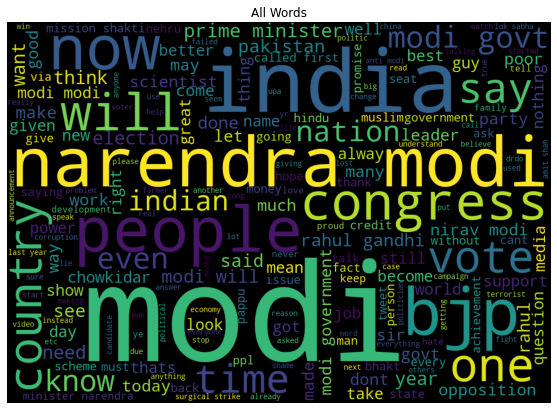

In [6]:
allwords = ''.join([cmts for cmts in dff['clean_text']])
wrdcld = WordCloud(width = 1000, height = 700, random_state = random.randint(1, 2001), max_font_size = 250, colormap = 'viridis').generate(allwords)
plt.figure(figsize=(10,7))
plt.imshow(wrdcld, interpolation = "kaiser")
plt.title("All Words")
plt.axis('off')
plt.show()

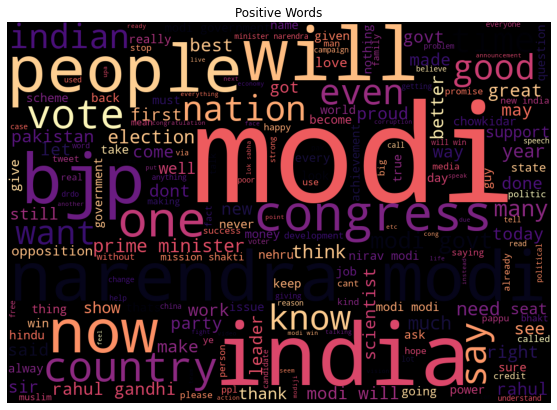

In [7]:
allwords = ''.join([cmts for cmts in dff['clean_text'][dff['category']==1]])
wrdcld = WordCloud(width = 1000, height = 700, random_state = random.randint(1, 2001), max_font_size = 250, colormap = 'magma').generate(allwords)
plt.figure(figsize=(10,7))
plt.imshow(wrdcld, interpolation = "kaiser")
plt.title("Positive Words")
plt.axis('off')
plt.show()

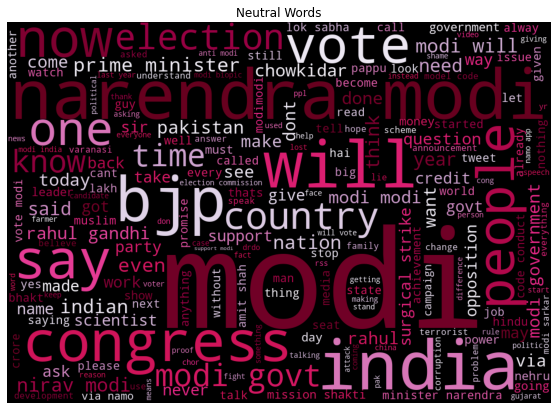

In [8]:
allwords = ''.join([cmts for cmts in dff['clean_text'][dff['category']==0]])
wrdcld = WordCloud(width = 1000, height = 700, random_state = random.randint(1, 2001), max_font_size = 250, colormap = 'PuRd').generate(allwords)
plt.figure(figsize=(10,7))
plt.imshow(wrdcld, interpolation = "kaiser")
plt.title("Neutral Words")
plt.axis('off')
plt.show()

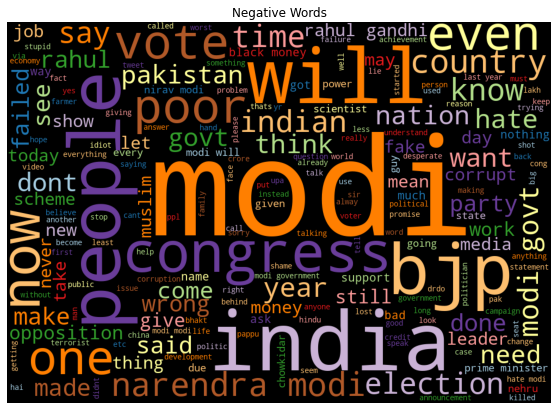

In [9]:
allwords = ''.join([cmts for cmts in dff['clean_text'][dff['category']==-1]])
wrdcld = WordCloud(width = 1000, height = 700, random_state = random.randint(1, 2001), max_font_size = 250, colormap = 'Paired').generate(allwords)
plt.figure(figsize=(10,7))
plt.imshow(wrdcld, interpolation = "kaiser")
plt.title("Negative Words")
plt.axis('off')
plt.show()

# Natural Language Processing (NLP)

In [10]:
test = np.array(dff.clean_text)
print("\nDimentions of clean_text:",test.shape)

np.set_printoptions(precision=3, suppress=True, threshold=500) 
print("\nTwitter Text Comments: \n", test)


Dimentions of clean_text: (162969,)

Twitter Text Comments: 
 ['when modi promised minimum government maximum governance expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'
 'talk all the nonsense and continue all the drama will vote for modi '
 'what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax'
 ... 'did you cover her interaction forum where she left '
 'there big project came into india modi dream project but not happened reality'
 'have you ever listen about like gurukul where discipline are maintained even narendra modi rss only maintaining the culture indian more attack politics but someone attack hinduism rss will take action that proud for ']


In [11]:

lemmatizer = WordNetLemmatizer()
words = []
for line in test:
    words.extend(line.strip().split())
test_lem = list(map(lemmatizer.lemmatize, words))
print("Lemmatized words: \n", pd.DataFrame(test_lem))

ps = PorterStemmer()
test_stem = [ps.stem(i) for i in test_lem]
print("\n\nStemmed words: \n", pd.DataFrame(test_stem))

Lemmatized words: 
                   0
0              when
1              modi
2          promised
3           minimum
4        government
...             ...
3238279        take
3238280      action
3238281        that
3238282       proud
3238283         for

[3238284 rows x 1 columns]


Stemmed words: 
                0
0           when
1           modi
2         promis
3        minimum
4         govern
...          ...
3238279     take
3238280   action
3238281     that
3238282    proud
3238283      for

[3238284 rows x 1 columns]


In [12]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
X = bow_vectorizer.fit_transform(test).toarray()
feature_df = pd.DataFrame(X)
feature_names = bow_vectorizer.get_feature_names()
print("Feature Matrix (Vectorized Description) :\n", X)
print("\nFeatured Words are :\n", np.array(feature_names))
print("\nShowing in DataFrame Format:")
pd.DataFrame(X, columns = feature_names)

Feature Matrix (Vectorized Description) :
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Featured Words are :
 ['aap' 'abhinandan' 'able' ... 'youth' 'yrs' 'zero']

Showing in DataFrame Format:


,aap,abhinandan,able,absolutely,abt,abuse,accept,according,account,accounts,...,year,years,yes,yesterday,yogi,young,youre,youth,yrs,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
Y = dff['category'].values
print("\nDimentions of X:",X.shape, "\tDimentions of Y:", Y.shape)

print("\nY data: \n", Y)

sc = StandardScaler()
X_sc = sc.fit_transform(X)
print("\n Scaled X data: \n", X_sc)


Dimentions of X: (162969, 1000) 	Dimentions of Y: (162969,)

Y data: 
 [-1.  0.  1. ...  0.  0.  1.]

 Scaled X data: 
 [[-0.066 -0.043 -0.073 ... -0.072 -0.085 -0.044]
 [-0.066 -0.043 -0.073 ... -0.072 -0.085 -0.044]
 [-0.066 -0.043 -0.073 ... -0.072 -0.085 -0.044]
 ...
 [-0.066 -0.043 -0.073 ... -0.072 -0.085 -0.044]
 [-0.066 -0.043 -0.073 ... -0.072 -0.085 -0.044]
 [-0.066 -0.043 -0.073 ... -0.072 -0.085 -0.044]]


# Testing with ML Algorithms

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.075, random_state=0)
print("Train Set Dimensions:\n X:", X_train.shape, "\n Y:", Y_train.shape)
print("\nTest Set Dimensions:\n X:", X_test.shape, "\n Y:", Y_test.shape)
np.set_printoptions(precision=2, suppress=True, threshold=50) #changing printing options

Train Set Dimensions:
 X: (150746, 1000) 
 Y: (150746,)

Test Set Dimensions:
 X: (12223, 1000) 
 Y: (12223,)


In [ ]:
#2-> KNN Classification
#model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5) 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)


In [ ]:

print("\n(KNN-classification) Accuracy:", accuracy_score(Y_test, Y_pred)*100, "%")
print("\nTest Data [Prediction | Actual results]:")
print(np.concatenate((Y_pred.reshape(-1,1), Y_test.reshape(-1,1)), axis =1))
CM = confusion_matrix(Y_test, Y_pred)
print("\n Confusion Matrix:\n", CM)
print("\nTest Data Classification Report:")
print(classification_report(Y_test, Y_pred))
plt.clf()
print("\nTotal Correct Prediction =", CM.trace(), "/", X_test.shape[0])
plot_confusion_matrix(knn, X_test, Y_test, cmap='winter')
plt.show()